In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
from keras import layers
from keras import Sequential
# from keras import Flatten


In [6]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))




In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 10)                9

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 18s 8ms/step - loss: 0.8259 - accuracy: 0.7181 - val_loss: 0.4545 - val_accuracy: 0.8746
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4343 - accuracy: 0.8773 - val_loss: 0.3912 - val_accuracy: 0.8896
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3665 - accuracy: 0.8959 - val_loss: 0.3259 - val_accuracy: 0.9077
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3248 - accuracy: 0.9068 - val_loss: 0.3222 - val_accuracy: 0.9068
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2969 - accuracy: 0.9128 - val_loss: 0.2905 - val_accuracy: 0.9147
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2738 - accuracy: 0.9206 - val_loss: 0.2727 - val_accuracy: 0.9191
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2584 - accuracy: 0.9240 - val_loss: 0.2602 - val_accuracy

In [10]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [11]:
y_pred = y_prob.argmax(axis=1)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9343

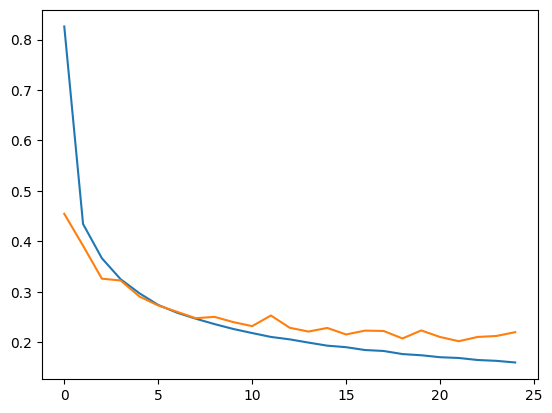

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])